<br>

### Exercício: Regressão Linear:
__Parte 1:__

1- Usando a função getData(), carregue os dados disponibilizados.

2- Separe parte dos dados para o dataset de teste.

3- Usando a metodologia de validação cruzada, teste diferentes parâmetros da regLinear - diferentes learning_rates e num_steps - para escolher a melhor combinação de parâmetros.

4- Implemente a regressão linear do scikit-learn e compare os resultados obtidos.

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_friedman1,make_classification

In [356]:
#função para acessar os dados do exercício 1

def getData():
    X, y = make_friedman1(n_samples = 10000, n_features = 5, noise = 5.0, random_state = 0)
    return X, y

In [357]:
#classe regLinear para exercício

class regLinear():
    
    def __init__(self, learning_rate, num_steps):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        
    def fit(self, X, y):
        y = y.reshape(-1,1)
        m = X.shape[0] 
        k = X.shape[1] 
        theta = np.random.randn(k+1,1) 
        X_b = np.c_[np.ones((m, 1)), X] 
        for step in range(self.num_steps):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - self.learning_rate * gradients
        self.theta_final = theta
        print("modelo treinado.")
        
    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        preds = X_b.dot(self.theta_final)
        return preds.reshape(-1,)

In [358]:
#função para acessar os dados do exercício 2

def getData2():
    X, y = make_classification(n_classes=2, n_features=5, n_samples=10000, random_state = 0)
    return X, y

In [359]:
X,y=getData()

In [360]:
X.shape, y.shape

((10000, 5), (10000,))

In [361]:
from sklearn.model_selection import train_test_split

In [362]:
x1=pd.DataFrame(x)

In [363]:
x1.head()

,0,1,2,3,4,5
0,1.0,0.548814,0.715189,0.602763,0.544883,0.423655
1,1.0,0.645894,0.437587,0.891773,0.963663,0.383442
2,1.0,0.791725,0.528895,0.568045,0.925597,0.071036
3,1.0,0.087129,0.020218,0.832620,0.778157,0.870012
4,1.0,0.978618,0.799159,0.461479,0.780529,0.118274


In [364]:
from sklearn.model_selection import KFold

In [365]:
kf=KFold(n_splits=5)
from sklearn.metrics import mean_squared_error

In [366]:
def funcao(x,learning_rate,num_steps):
  lista=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    lin_reg=regLinear(learning_rate,num_steps)
    lin_reg.fit(xtreino,ytreino)
    lista.append(mean_squared_error(ytreino,lin_reg.predict(xtreino)))
  print("Media MSE:  ",round(np.mean(lista),3))
  print()
  plt.figure(figsize=[20,8])
  plt.title("Valores MSE",fontsize=14)
  plt.scatter(range(len(lista)),lista)
  plt.plot(range(len(lista)),lista)
  plt.xlim(-1,5)
  plt.ylim(20,40)
  plt.xlabel("Número de iterações")
  plt.ylabel("MSE")
  plt.show

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.808



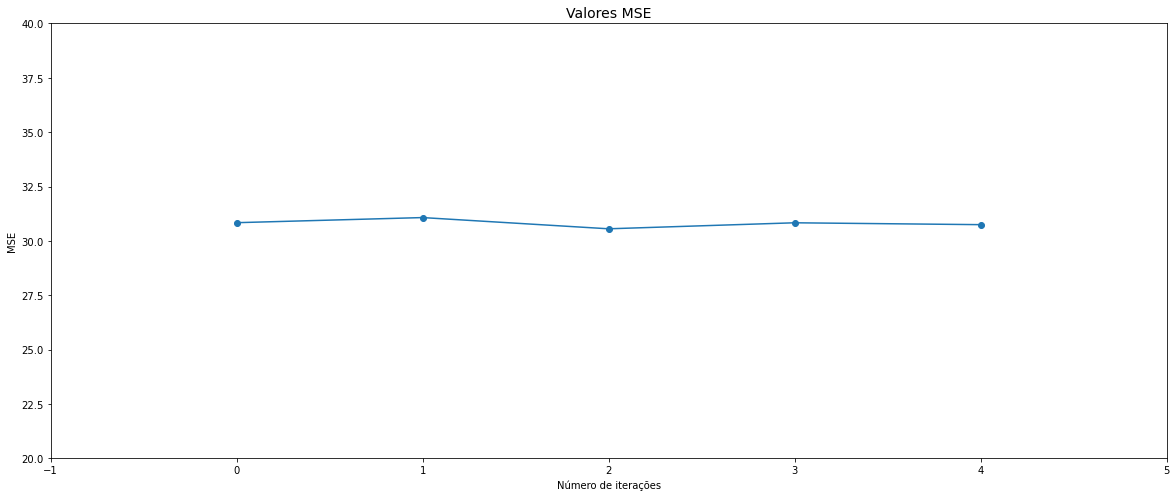

In [367]:
funcao(x,0.15,200)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   37.536



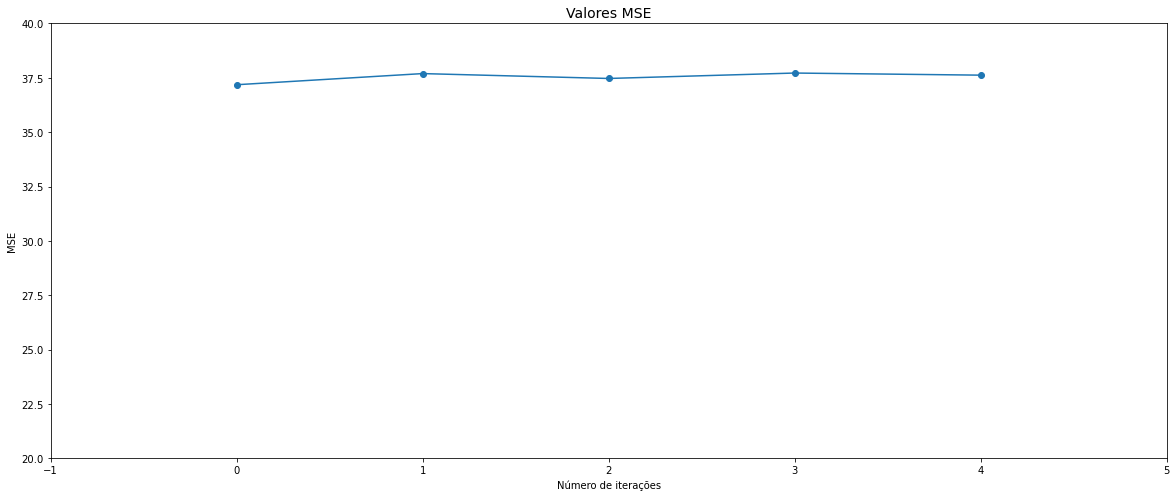

In [368]:
funcao(x,0.15,10)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   31.04



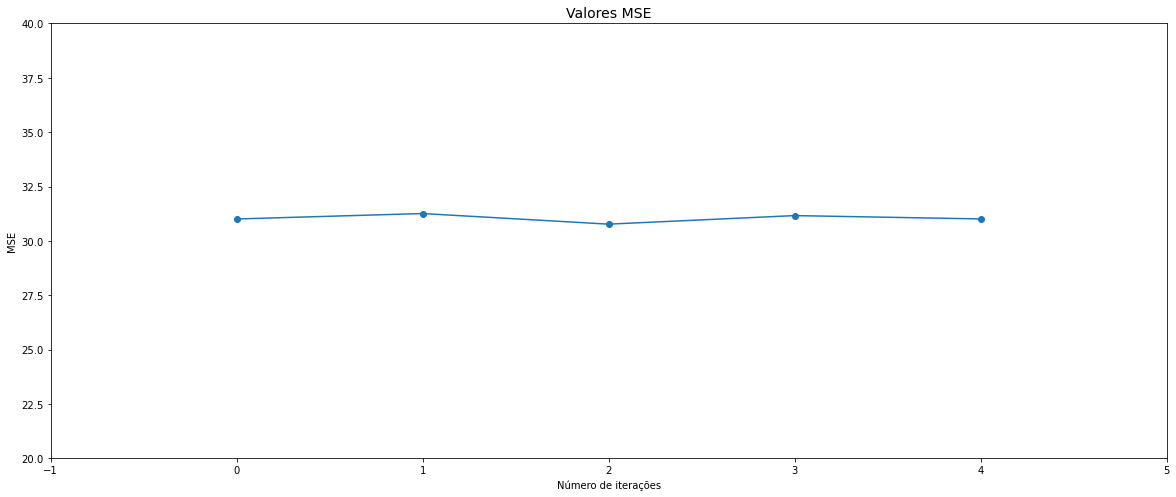

In [369]:
funcao(x,0.15,100)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   36.593



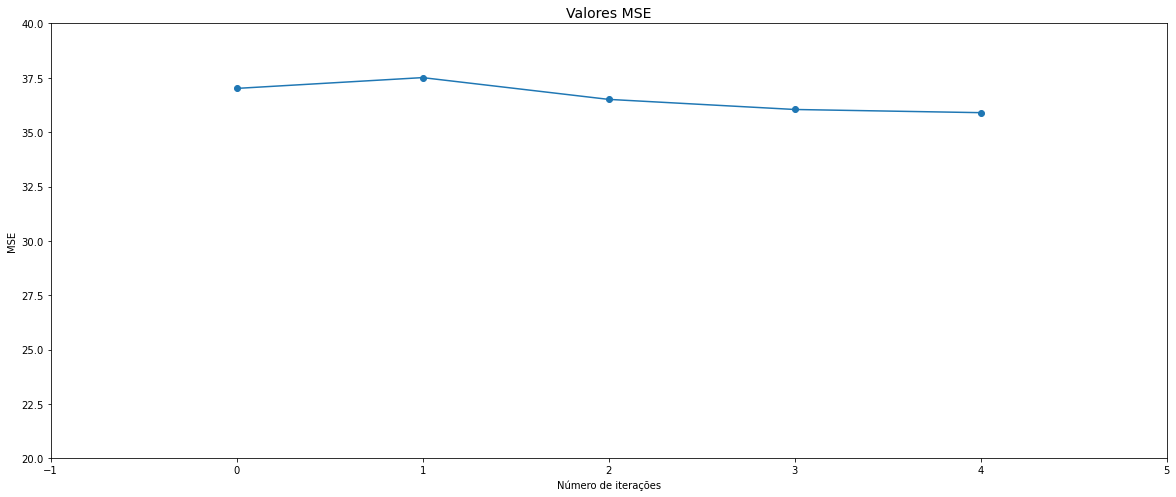

In [370]:
funcao(x,0.20,10)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.871



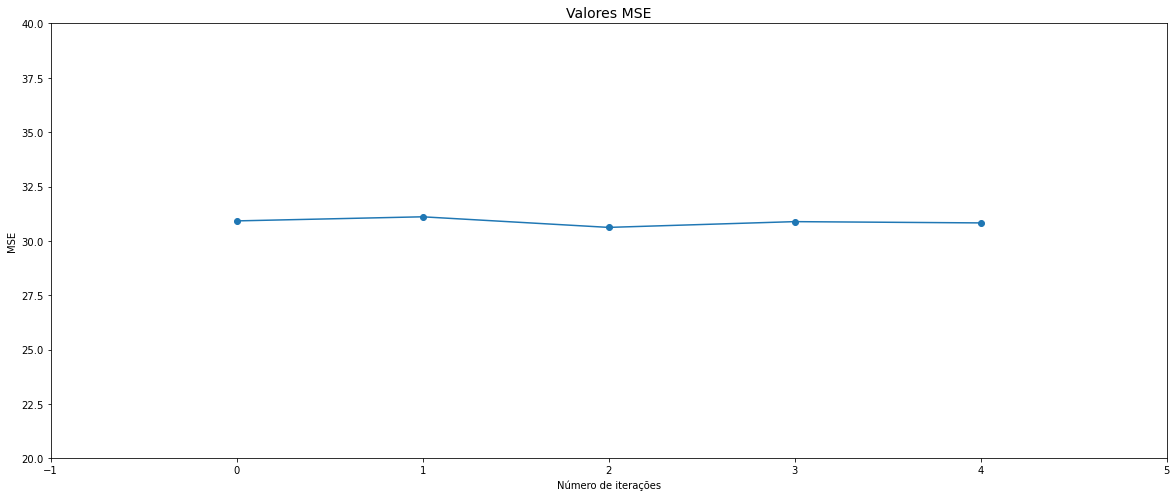

In [371]:
funcao(x,0.20,100)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.797



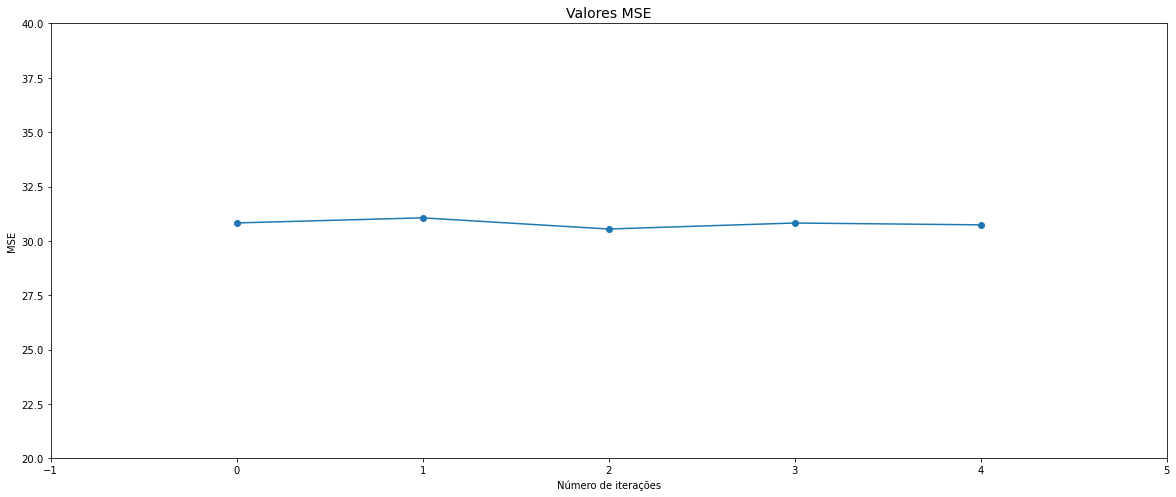

In [372]:
funcao(x,0.2,200)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.928



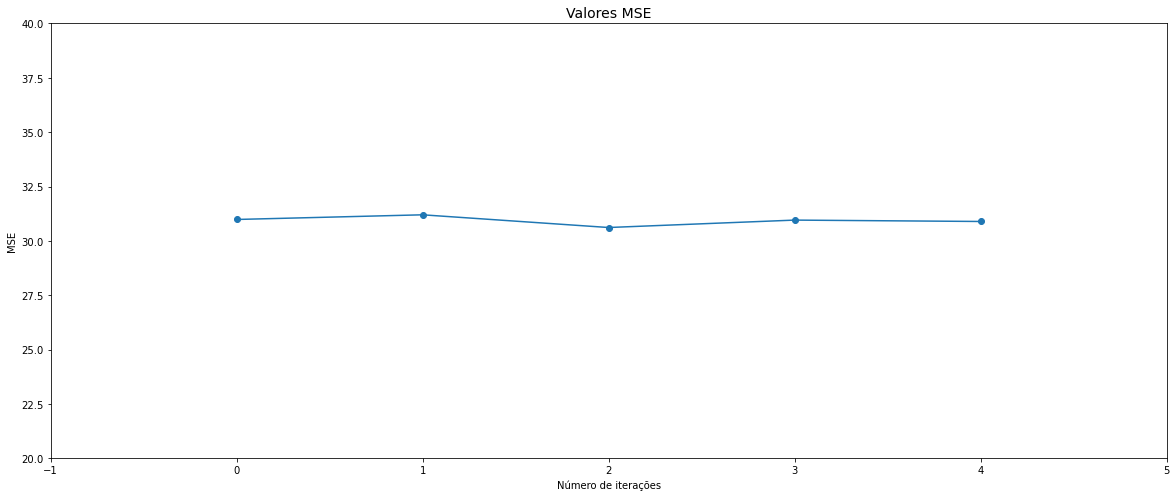

In [373]:
funcao(x,0.3,100)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.796



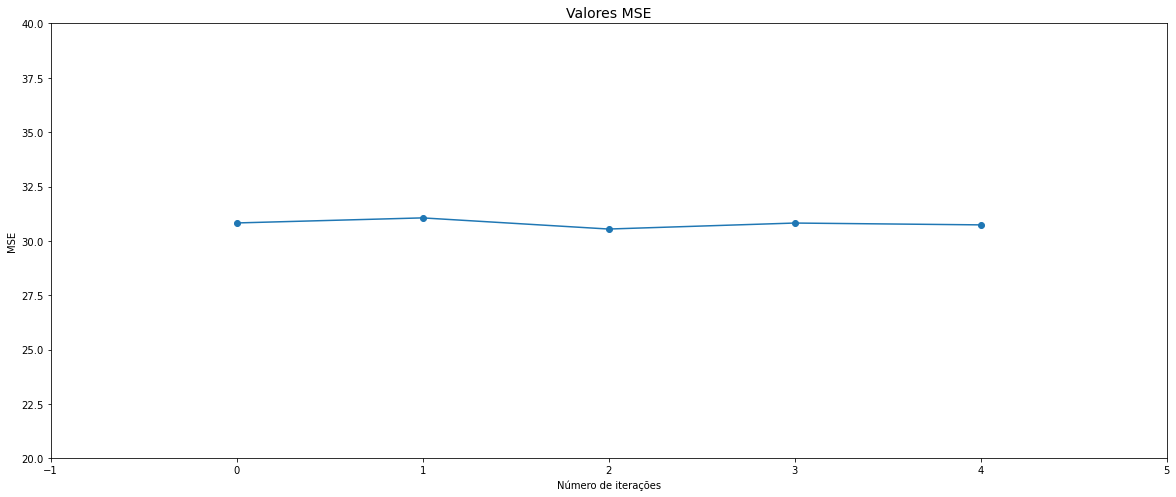

In [374]:
funcao(x,0.3,200)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.892



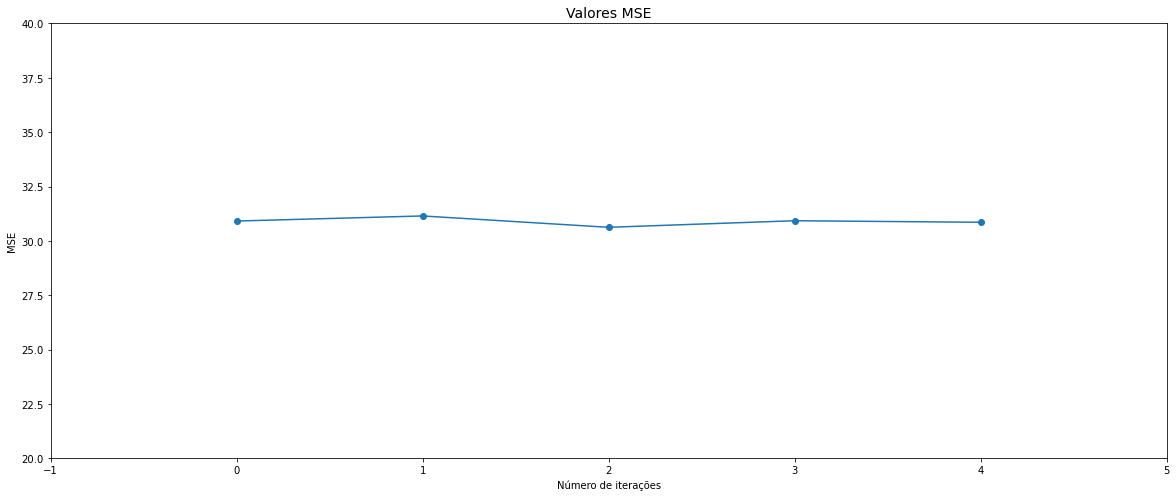

In [375]:
funcao(x,0.1,200)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   31.593



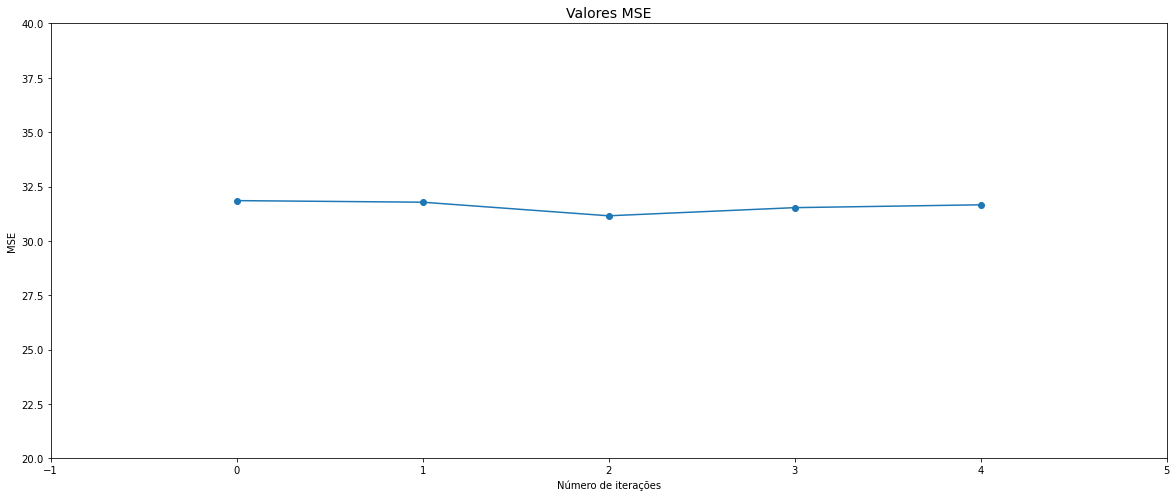

In [376]:
funcao(x,0.05,200)

# Ao final dos teste consegui identificar que os melhores parametros foram uma taxa de aprendizado de 0.2 com 200 passos apresentado um MSE médio de 30.795


```

```


---



In [377]:
from  sklearn.linear_model import LinearRegression

In [378]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [407]:
lr.intercept_, lr.coef_

(-0.05568613230241404,
 array([ 0.        ,  6.37661369,  7.0025    ,  0.21819147, 10.42594526,
         4.78517778]))

In [408]:
ypred=lr.predict(x)
mse=mean_squared_error(y,ypred)

print(mse)

30.80303834132047


In [409]:
from sklearn.metrics import mean_squared_error

def MSE(ytrue, ypred):
    return mean_squared_error(y_true = ytrue, y_pred = ypred)

In [410]:
learning_rate = 0.075
num_steps = 200

m = X.shape[0] #qtd. linhas
k = X.shape[1] #qtd. colunas

theta = np.random.randn(k+1,1) # inicialização aleatórias dos parâmetros.
X_b = np.c_[np.ones((m, 1)), X] #colocando x0 = 1 em todas as instâncias de X

for step in range(num_steps):
    
    print('passo:', step)
    print('theta:', theta.reshape(-1,))
    
    #calcula o gradiente
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    
    #atualiza os valores de theta
    theta = theta - learning_rate * gradients
    
    
    #calculando o MSE dentro do passo:
    ypred_step = X_b.dot(theta)
    MSE_step = MSE(ytrue = y, ypred = ypred_step)
    print("MSE:", MSE_step)
    print('\n-----------------------------------------------------------\n') 

passo: 0
theta: [ 0.04518823 -0.1895933   1.39893443  1.29972264 -0.49331823 -1.58211776]
MSE: 128.89114604167602

-----------------------------------------------------------

passo: 1
theta: [ 2.14867623  0.94077704  2.50981147  2.33890559  0.6927475  -0.45598511]
MSE: 77.81412489425007

-----------------------------------------------------------

passo: 2
theta: [3.51880424 1.69119325 3.24371295 2.99857918 1.49820846 0.291256  ]
MSE: 55.67558150119744

-----------------------------------------------------------

passo: 3
theta: [4.40723107 2.19194459 3.7299486  3.40925555 2.0533421  0.78952942]
MSE: 46.02778501206774

-----------------------------------------------------------

passo: 4
theta: [4.97927856 2.5286225  4.05346592 3.65666797 2.44373511 1.12418664]
MSE: 41.772553750237044

-----------------------------------------------------------

passo: 5
theta: [5.34355119 2.7574551  4.27006951 3.79713323 2.72561538 1.35129822]
MSE: 39.8465693969645

----------------------------------

MSE: 32.70345215190678

-----------------------------------------------------------

passo: 80
theta: [4.02842557 4.43786352 5.4151487  1.15127345 6.94619346 2.94987556]
MSE: 32.67118945479458

-----------------------------------------------------------

passo: 81
theta: [4.00612899 4.45056521 5.42344007 1.12899936 6.97889641 2.96166211]
MSE: 32.63956271113322

-----------------------------------------------------------

passo: 82
theta: [3.98395494 4.46317385 5.4316902  1.10705814 7.01125046 2.97336109]
MSE: 32.60855800308183

-----------------------------------------------------------

passo: 83
theta: [3.96190274 4.47569021 5.43989926 1.08544538 7.04325961 2.98497328]
MSE: 32.57816173604834

-----------------------------------------------------------

passo: 84
theta: [3.93997171 4.48811506 5.44806742 1.06415671 7.07492785 2.99649945]
MSE: 32.54836063095462

-----------------------------------------------------------

passo: 85
theta: [3.91816118 4.50044914 5.45619488 1.04318784 7.1

MSE: 31.33592342436169

-----------------------------------------------------------

passo: 163
theta: [2.53859032 5.23491816 5.97861578 0.11508647 8.76872991 3.68920679]
MSE: 31.328664968806393

-----------------------------------------------------------

passo: 164
theta: [2.52446001 5.24197522 5.98405032 0.10949422 8.78262753 3.69577514]
MSE: 31.321521590864826

-----------------------------------------------------------

passo: 165
theta: [2.51040695 5.24898435 5.98945681 0.1040081  8.7963889  3.70229983]
MSE: 31.314491149802286

-----------------------------------------------------------

passo: 166
theta: [2.49643072 5.2559459  5.99483537 0.0986266  8.81001553 3.70878119]
MSE: 31.307571550009964

-----------------------------------------------------------

passo: 167
theta: [2.4825309  5.26286025 6.00018615 0.09334823 8.82350889 3.71521958]
MSE: 31.300760739977907

-----------------------------------------------------------

passo: 168
theta: [2.46870705 5.26972775 6.00550926 0.0

In [411]:
learning_rate = 0.075
num_steps = 200

y = y.reshape(-1, 1)

m = x.shape[0] #qtd. linhas
k = x.shape[1] #qtd. colunas

theta = np.random.randn(k+1,1) # inicialização aleatórias dos parâmetros.
X_b = np.c_[np.ones((m, 1)), x] #colocando x0 = 1 em todas as instâncias de X

for step in range(num_steps):
    
    print('passo:', step)
    print('theta:', theta.reshape(-1,))
    
    #calcula o gradiente
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    
    #atualiza os valores de theta
    theta = theta - learning_rate * gradients
    
    
    #calculando o MSE dentro do passo:
    ypred_step = X_b.dot(theta)
    MSE_step = MSE(ytrue = y, ypred = ypred_step)
  
    print("MSE:", MSE_step)
    print('\n-----------------------------------------------------------\n') 

passo: 0
theta: [ 0.71042319  0.64480186  1.01827906 -0.48524116  0.28041671 -1.42644448
  1.26942426]
MSE: 85.81463778088772

-----------------------------------------------------------

passo: 1
theta: [ 2.6004026   2.53478126  2.02709385  0.54377276  1.22560671 -0.33476393
  2.25282511]
MSE: 53.61987014636629

-----------------------------------------------------------

passo: 2
theta: [3.54549323 3.4798719  2.55193539 1.09192594 1.68674492 0.27209512
 2.75383193]
MSE: 45.10117999419

-----------------------------------------------------------

passo: 3
theta: [4.0096807  3.94405937 2.83032079 1.39503915 1.90176423 0.63155812
 3.00932076]
MSE: 42.72245973426321

-----------------------------------------------------------

passo: 4
theta: [4.22917477 4.16355344 2.98316816 1.57316908 1.99178985 0.86450295
 3.13988169]
MSE: 41.93873185718654

-----------------------------------------------------------

passo: 5
theta: [4.32422666 4.25860533 3.07203608 1.68743795 2.01848133 1.03247408
 

MSE: 32.9571273172679

-----------------------------------------------------------

passo: 88
theta: [2.36353765 2.29791631 4.59020881 4.51206897 0.29660746 6.56266984
 3.60911325]
MSE: 32.917402375121874

-----------------------------------------------------------

passo: 89
theta: [2.34556285 2.27994151 4.60320376 4.53379818 0.28710556 6.6025177
 3.61447523]
MSE: 32.878454948323835

-----------------------------------------------------------

passo: 90
theta: [2.3277254  2.26210407 4.61610895 4.55532624 0.27778514 6.64193167
 3.61984192]
MSE: 32.840268907550616

-----------------------------------------------------------

passo: 91
theta: [2.31002426 2.24440292 4.62892492 4.57665516 0.26864347 6.68091668
 3.62521272]
MSE: 32.8028284755108

-----------------------------------------------------------

passo: 92
theta: [2.29245837 2.22683704 4.64165223 4.59778689 0.25967788 6.71947763
 3.63058703]
MSE: 32.766118218946595

-----------------------------------------------------------

pass

MSE: 31.42790808950245

-----------------------------------------------------------

passo: 157
theta: [ 1.39666398  1.33104265  5.30299525  5.62795134 -0.04847633  8.50963353
  3.96656403]
MSE: 31.417187489209837

-----------------------------------------------------------

passo: 158
theta: [ 1.38607067  1.32044934  5.31096086  5.63954511 -0.05024996  8.52860126
  3.9713059 ]
MSE: 31.406660430641693

-----------------------------------------------------------

passo: 159
theta: [ 1.37555814  1.30993681  5.31886907  5.65103599 -0.05196351  8.5473698
  3.97603053]
MSE: 31.396323210229525

-----------------------------------------------------------

passo: 160
theta: [ 1.36512579  1.29950445  5.32672026  5.66242498 -0.053618    8.56594136
  3.9807378 ]
MSE: 31.38617219961648

-----------------------------------------------------------

passo: 161
theta: [ 1.35477299  1.28915166  5.33451483  5.67371301 -0.05521444  8.58431811
  3.98542762]
MSE: 31.376203844045023

-----------------------

In [413]:
def regLinearEquacaoNormal(X, y):
    # adicionando x0 = 1 em cada instância
    X = np.c_[np.ones((X.shape[0], 1)), X]
    
    transposta_X = X.T
    XTX = transposta_X.dot(X)
    inversa = np.linalg.inv( XTX )
    
    theta_best = inversa.dot(transposta_X).dot(y)
    return theta_best

In [414]:
regLinearEquacaoNormal(X, y)

array([[-0.05568613],
       [ 6.37661369],
       [ 7.0025    ],
       [ 0.21819147],
       [10.42594526],
       [ 4.78517778]])

In [385]:
class regLinear():
    
    def __init__(self, learning_rate, num_steps):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        
    def fit(self, X, y):
        y = y.reshape(-1,1)
        m = X.shape[0] 
        k = X.shape[1] 
        theta = np.random.randn(k+1,1) 
        X_b = np.c_[np.ones((m, 1)), X] 
        for step in range(self.num_steps):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - self.learning_rate * gradients
        self.theta_final = theta
        print("modelo treinado.")
        
    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        preds = X_b.dot(self.theta_final)
        return preds

In [386]:
rg = regLinear(learning_rate = 0.075, num_steps = 200)

In [387]:
rg.fit(X, y)

modelo treinado.


In [388]:
rg.theta_final

array([[ 2.13838821],
       [ 5.43996572],
       [ 6.21552639],
       [-0.14305648],
       [ 9.12028424],
       [ 3.92983537]])

In [389]:
rg.predict(X)

array([[16.11734715],
       [18.54003132],
       [18.37230759],
       ...,
       [15.33384784],
       [17.51175906],
       [19.13110921]])

Comparando com o resultado da regressão linear do scikit-learn:

In [390]:
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_, lm.coef_)
print()
lm.predict(X)

[-0.05568613] [[ 6.37661369  7.0025      0.21819147 10.42594526  4.78517778]]



array([[16.29170271],
       [19.20364386],
       [18.8105078 ],
       ...,
       [15.3053878 ],
       [17.95296077],
       [19.63525471]])

__Parte 2 (Introdução):__

Para cada variável explicativa $X_1, .., X_5$, crie outras variáveis usando o __quadrado__ de cada um delas. Desta forma, o conjunto final será de 10 variáveis, em que:

$X_6 = (X_1)^{2}$, $X_7 = (X_2)^{2}$, $X_8 = (X_3)^{2}$, $X_9 = (X_4)^{2}$, $X_{10} = (X_5)^{2}$.

Ao treinarmos uma regressão linear com essas 10 variáveis, a predição é da forma:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2}$

Como estamos usando o quadrado das variáveis explicativas, dizemos que temos um __modelo de regressão polinomial de grau 2__. Podemos ter variações deste modelo:

-Podemos aumentar o grau: basta mudar a potência que elevamos as variáveis. Por exemplo, podemos incluir o __cubo__ das variáveis e termos um modelo polinomial de ordem 3.

-Podemos ter __interações__ entre as variáveis: multiplicações entre as variáveis.

Exemplo:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2} + \theta_{11} \cdot (X_1)^{3} + \theta_{12} \cdot V1 + \theta_{13} \cdot V2$,

onde

$V_1 = X_1 \cdot X_2$ e $V_2 = (X_2)^{2} \cdot X_4$


__Parte 2 (Exercício):__

1- Estude o link:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

em que é discutido como criar modelos polinomiais com o scikit-learn de forma detalhada.

2- Repita os passos da primeira parte, mas agora considerando polinômios de graus 2 ou mais.

3- Inclua regularização Ridge e Lasso nas análises e teste os resultados para diferentes parâmetros $\alpha$.

<br>



In [391]:
x1,y1=getData2()

In [392]:
from sklearn.preprocessing import PolynomialFeatures

In [415]:
lista=[0.07,0.08,0.09,0.1,0.12,0.13,0.14,0.15]
for i in lista:
  lista1=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    pol=PolynomialFeatures(degree=2,include_bias=False)
    xpol=pol.fit_transform(xtreino)

    lin_reg=regLinear(i,1000)
    lin_reg.fit(xpol,ytreino)
    lista1.append(mean_squared_error(ytreino,lin_reg.predict(xpol)))
  print("Media MSE com learning  rate  = ",i ,"\n" ,   round(np.mean(lista1),3))
  print()

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.07 
 28.343

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.08 
 28.087

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.09 
 27.874

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.1 
 27.765

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.12 
 27.501

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.13 
 27.406

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.14 
 27.305

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
mo

### Com o teste acima determinamos que a melhor learning rate se trata de 0.14, a partir disso realizarei outro loop alterando o número de passos.

In [416]:
step=[250,500,1000,1500,2000,5000]
for s in step:
  lista1=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    pol=PolynomialFeatures(degree=2,include_bias=False)
    xpol=pol.fit_transform(xtreino)

    lin_reg=regLinear(0.14,s)
    lin_reg.fit(xpol,ytreino)
    lista1.append(mean_squared_error(ytreino,lin_reg.predict(xpol)))
  print("Media MSE com numeros de passos  = ",s ,"\n" ,   round(np.mean(lista1),3))
  print()

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  250 
 29.369

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  500 
 28.32

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  1000 
 27.289

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  1500 
 26.902

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  2000 
 26.747

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  5000 
 26.633



### Vimos que com  5000 passos encontramos um Mse bem baixo, porém, irei escolher 2000 passos como parâmetro,pois não houve diferença significativa com o valor encontrado em 5000 passos.

### Portanto os parâmetros selecionados para regressão polinomial de grau 2 sera de 0.14 a taxa de aprendizado e 2000 passos.

In [417]:
lr_pol=LinearRegression()

In [418]:
xpol1=pol.fit_transform(x)

In [419]:
lr_pol.fit(xpol1,y)

LinearRegression()

In [420]:
mse_pol=mean_squared_error(y,lr_pol.predict(xpol1))

In [421]:
print(mse_pol)

26.657070929198188


### Considerando o Mse da regressão do sklearn, vemos que ficou bem próximo do valor selecionado anteriormente, agora iremos instanciar a regularização.

In [422]:
from sklearn.linear_model import Ridge,Lasso

In [423]:
## Regularização Ridge

alpha=[0.01,0.1,1,10,100]
for a in alpha:
  lista1=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    pol=PolynomialFeatures(degree=2,include_bias=False)
    xpol=pol.fit_transform(xtreino)

    ridge=Ridge(alpha=a)
    ridge.fit(xpol,ytreino)
    lista1.append(mean_squared_error(ytreino,ridge.predict(xpol)))
  print("Media MSE com alpha   = ",a ,"\n" ,   round(np.mean(lista1),3))
  print()

Media MSE com alpha   =  0.01 
 26.632

Media MSE com alpha   =  0.1 
 26.632

Media MSE com alpha   =  1 
 26.638

Media MSE com alpha   =  10 
 26.957

Media MSE com alpha   =  100 
 29.423



In [424]:
## Regularização Lasso

alpha=[0.01,0.1,1,10,100]
for a in alpha:
  lista1=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    pol=PolynomialFeatures(degree=2,include_bias=False)
    xpol=pol.fit_transform(xtreino)

    lasso=Lasso(alpha=a)
    lasso.fit(xpol,ytreino)
    lista1.append(mean_squared_error(ytreino,lasso.predict(xpol)))
  print("Media MSE com alpha   = ",a ,"\n" ,   round(np.mean(lista1),3))
  print()

Media MSE com alpha   =  0.01 
 26.878

Media MSE com alpha   =  0.1 
 31.17

Media MSE com alpha   =  1 
 49.186

Media MSE com alpha   =  10 
 49.186

Media MSE com alpha   =  100 
 49.186



## Com a regularização é posssível constatar a melhor eficiência da regularização Ridge, apresentando um erro menor com alpha = 0.01

In [425]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [426]:
def polyFit(X, y, grau): 
    
    polybig_features = PolynomialFeatures(degree = grau, include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    #criando um pipeline: sequencia de execução de passos
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    polynomial_regression.fit(X, y)
    return polynomial_regression

grau:  1


ValueError: x and y must be the same size

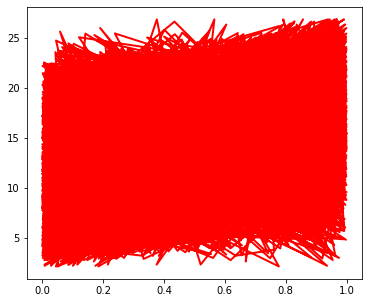

In [428]:
for grau in [1,2,20,300]:  
    
    print("grau: ", grau)
    
    polyfit = polyFit(X, y, grau)
    
    ypoly = polyfit.predict(X)
    
    plt.figure(figsize=[6,5])
    plt.plot(X, ypoly, label=str(grau), lw=2, c = 'red')
    plt.scatter(X, y, c = "blue")
    plt.axis([-3, 3, 0, 10])
    plt.show()
    print("RMSE:")
    print(np.sqrt(np.mean(np.square(y - polyfit.predict(X)))))
    print("------------------------------------------------\n\n")

In [ ]:
x.shape, y.shape

### Exercício: Regressão Logística:

__Parte 1:__

Crie uma classe regLogistica para treinar o modelo de regressão logística. Essa classe deve ser usada para problemas de classificação binária, cuja variável target assume os valores: 0 (classe negativa) e 1 (classe positiva).

O método construtor dessa classe deve possuir 3 parâmetros: learning_rate, num_steps e limiar.

Os outros médotos devem ser:

    - médoto fit: para treinar o modelo - usando gradient descent
    
    - médoto predict_proba: para retornar a probabilidade da classe 1
    
    - médoto predict: retornar a classe predita: 0 ou 1 - dependente do limiar
    

__Parte 2:__

Usando a função getData2(), carregue o dataset disponibilizado.

Use a regLogistica, classe criada na parte 1 do exercício, para treinar modelos nestes dados. Use validação cruzada para seleção dos parâmetros. Considere diferentes métricas de classificação e justifique as escolhas.

In [ ]:
def getData2():
    X, y = make_classification(n_classes=2, n_features=5, n_samples=10000, random_state = 0)
    return X, y

In [ ]:
def logLossCost(ytrue, ypred_probs):
    return (ytrue * np.log(ypred_probs) + (1 - ytrue) * np.log(1 - ypred_probs)).mean() * -1

In [ ]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

In [ ]:
class regLog():

    
    def __init__(self, learning_rate, num_steps,limiar):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        self.limiar=limiar
        
    def fit(self, X, y):
      y=y.reshape(-1,1)
      m=X.shape[0]
      k=X.shape[1]
      X_b=np.c_[np.ones((m,1)),X]
      theta=np.random.randn(k+1,1)
      for step in range(self.num_steps):
        yscore=sigmoid(X_b.dot(theta))
        gradient=X_b.T.dot(yscore-y)
        theta=theta-self.learning_rate*gradient
      self.theta_final=theta  


    
     


        
    def predict_proba(self, X):
      m=X.shape[0]
      x_b=np.c_[np.ones((m,1)),X] 

      probs = sigmoid(x_b.dot(self.theta_final))
      
      return probs.reshape(-1,)

    def predict(self,X):
      m=X.shape[0]
      x_b=np.c_[np.ones((m,1)),X] 

      probs = sigmoid(x_b.dot(self.theta_final))
      ypred= np.where(probs>self.limiar,1,0)
      return ypred


In [ ]:
x1,y1=getData2()

In [ ]:
rl=regLog(0.01,1000,0.5)

In [ ]:
rl.fit(x1,y1)

In [ ]:
rl.predict_proba(x1)

In [ ]:
ypred=rl.predict(x1)

In [ ]:
from  sklearn.metrics import confusion_matrix

In [ ]:
ypred=np.where(rl.predict_proba(x1)>0.5,1,0)
cf=confusion_matrix(y1,ypred)

In [ ]:
print(cf)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logi=LogisticRegression()

In [ ]:
logi.fit(x1,y1)

In [ ]:
y12=logi.predict(x1)

In [ ]:
cf1=confusion_matrix(y1,y12)

In [ ]:
print(cf1)

## Com a análise acima pude verificar a proxi, idade entre os valores da confusion matrix do modelo criado e do modelo de regressão do sk learn, o que mostra que o modelo trabalhou bem

In [ ]:
def func(x,y,v1,v2):
  lng_rate=[0.001,0.01,0.1,1]
  for l in lng_rate:
    reglog=regLog(l,v1,v2)
    reglog.fit(x,y)
    ypred=reglog.predict(x)
    cf=confusion_matrix(y,ypred)
    print(" Matriz de confusão para uma taxa de aprendizado de :",l )
  
    print(cf)
    print()

## testando os  dados variando a learnig rate

In [ ]:
func(x1,y1,1000,0.5)

## Com a análise acima pude verificar qua a taxa de aprendizado de 0.1 se comportou melhor nos dados, por isso utlizarei ela na variação do numero de passos abaixo

In [ ]:
def func1(x,y,v1,v2):
  num_steps=[100,500,1000,2000]
  for l in num_steps:
    reglog=regLog(v1,l,v2)
    reglog.fit(x,y)
    ypred=reglog.predict(x)
    cf=confusion_matrix(y,ypred)
    print(" Matriz de confusão para um número de passos de  :",l )
  
    print(cf)
    print()

In [ ]:
func1(x1,y1,0.1,0.5)

## Após os testes pude verificar que com a taxa de 0.1 e número de passos = 1000 , apresentaram os melhores resultados.